<a href="https://colab.research.google.com/github/dylanwalker/MGSC496/blob/main/MGSC496_L10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the in-class notebook for MGSC496 Lecture 10.

---



In [ ]:
import sklearn
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Things to mention:
* 1d vs 2d tensors and `.view(-1,1)`
* batch dimension as the first dimension of the tensor (just mention; more discussion in next reading)


# Wanted to review single neuron: guessing vs training

Let's compare the two ways of getting the weights/bias for a single neuron for our "is a cat" prediction problem:

## Guessing weights/biases (no pytorch)

In [ ]:
# Code to guess weights/bias for single neuron "is_cat" predictor

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Load the data
cat_df = pd.DataFrame({'is_mammal':[1,1,1,0],
                       'four_legged':[0,1,1,1],
                       'body_weight_lbs':[70.0,8800.0,9.0,0.5],
                       'body_height_inches':[36.0,324.0,9.0,1.0],
                       'has_thumbs':[1,0,0,0],
                       'animal':['chimp','elephant','cat','lizard'],
                       'is_cat':[0,0,1,0]})

# Use the StandardScaler from sklearn to transform features to comparable scales
x = cat_df.loc[:,'is_mammal':'has_thumbs']
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

#  Generate random weights biases
w = np.random.randn(5)
b = np.random.randn(1)
print(w)
print(b)

# Define our nonlinear activation function
def delta(x, thresh=0.5):
  sigmoid = 1/(1+np.exp(-x))
  return (sigmoid>thresh)

# 3. Use yhat = delta(np.dot(x,w)+b) to get a prediction (for each row of the data) of whether the row is a cat and print out yhat
yhat = delta(np.dot(x,w)+b)
print(yhat)

# Re-run this cell multiple times and look for the result [False False True False] -- this is predicting the cat is a cat and all others are not

[-0.70538456 -1.88323402 -0.90163098 -0.15260202  1.99976351]
[-1.69429501]
[ True False False False]


## Training Weights/Biases using Gradient Descent

In [ ]:
# Code to train single neuron "is_cat" predictor

import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Load the data and scale it 
cat_df = pd.DataFrame({'is_mammal':[1,1,1,0],
                       'four_legged':[0,1,1,1],
                       'body_weight_lbs':[70.0,8800.0,9.0,0.5],
                       'body_height_inches':[36.0,324.0,9.0,1.0],
                       'has_thumbs':[1,0,0,0],
                       'animal':['chimp','elephant','cat','lizard'],
                       'is_cat':[0,0,1,0]})
scaler = StandardScaler()
scaler.fit(cat_df.loc[:,'is_mammal':'has_thumbs'])
cat_df.loc[:,'is_mammal':'has_thumbs'] = scaler.transform(cat_df.loc[:,'is_mammal':'has_thumbs'])


# Make the features (inputs), X,  and outcomes (targets), y tensors from the dataframe 
X = torch.tensor(cat_df.loc[:,'is_mammal':'has_thumbs'].values)
y = torch.tensor(cat_df.loc[:,'is_cat'].values)

# Instead of returning the prediciton true or false for each y, we'll return the sigmoid.
# We can think of this as a score that relfects how much the NN thinks each row is a cat
# This will be more useful in calculating the cost function
def sigmoid(x):
  sigmoid = 1/(1+torch.exp(-x))
  return sigmoid

# Initialize the weights/bias to random values
w = torch.tensor(np.random.randn(5),requires_grad=True)
b = torch.tensor(np.random.randn(1),requires_grad=True)

for epoch in range(1,1000): # run over the entire training data 1000 time
  yhat = sigmoid(X @ w + b) # calculate the predicted value. @ means matrix multiplication, as we discussed in class (before with numpy, we used np.dot(), but this is more general)
  C = ((yhat - y)**2).sum() # Calculate the cost -- a single number representing how badly our NN did across all the training data
  if epoch%100==0: # Every 100 epochs, we will print out the predicted values and the cost function
    print(f"yhat = {yhat}")
    print(f"cost: {C}")
  C.backward() # Tell pytorch to perform backward propagation, to get the gradients for w and b
  with torch.no_grad(): # This line tells pytorch not to modify the computation graph for gradients for anything in the indented block below 
    w-=w.grad*5e-2 # Update the weights by taking a tiny step in the right direction
    b-=b.grad*5e-2 # Update the bias by taking a tiny step in the right direction
    w.grad.zero_() # set the gradient values in w and b to zero, so we can calculate them fresh on the next epoch
    b.grad.zero_()



# Reading Exercise Solution: Build a single neuron trained to predict wine quality

<hr/>
<img src="https://drive.google.com/uc?id=1sk8CSP26YY7sfyzmHGFXncuNRujkvu9v" align="left">

<font size=3 color="darkred">Exercise:  Build a single neuron trained to predict wine quality </font>

Following the same structure as the above example, train a single neuron to predict the quality of red wine based on many different features. Run the code below to read in the dataset, then:

<br />

1. Like in the example above, use the sklearn standard scalar to scale all the feature columns. Rescale the target (outcome), which is a number from 1 to 10 representing wine quality, to be a number between 0 and 1 (this is what we want if we're going to output a sigmoid for $\hat{y}$, because sigmoids can only be between 0 and 1) 

2. Make tensors for features $X$ and target $y$. (make sure their dtypes match that of the weights and biases, which may be torch.float32)

3. Create weight and bias tensors initialized to random numbers. You'll have to figure out what size they should be.

4. You can define the same sigmoid function as above to be your "activation" function.

5. Write code for your training loop. It should do the following:
 * Compute `yhat`
 * Calculate the cost function `C` (you can use the same on as in our "is cat" example )
 * Print out the cost every 1000 loops (use an `if epoch%1000==0` codeblock to do this)
 * Call `C.backward()`
 * Use a `with torch.no_grad()` codeblock to update the weight/bias tensors, then zero the gradients for both
6. Calculate the prediction for the training data using the fully trained model (i.e., get yhat as you did in the training loop, but now with the finalized weights/biases)
7. Run the plotting code provided below to plot the performance on the training data 


In [ ]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/dylanwalker/MGSC496/main/datasets/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Try it out
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
wine_df = pd.read_csv('https://raw.githubusercontent.com/dylanwalker/MGSC496/main/datasets/winequality-red.csv')

# 1. Use the sklearn standard scalar to scale all feature columns. Also scale the target column appropriately so it is between 0 and 1.
scaler = StandardScaler()
scaler.fit(wine_df.loc[:,'fixed acidity':'alcohol'])
wine_df.loc[:,'fixed acidity':'alcohol'] = scaler.transform(wine_df.loc[:,'fixed acidity':'alcohol'])
wine_df.quality = wine_df.quality/10
wine_df.head()


# 2. Make tensors for features  X  and target  y (make sure their dtypes match that of the weights and biases, which may be torch.float32).
X = torch.tensor(wine_df.loc[:,'fixed acidity':'alcohol'].values,dtype=torch.float32)
y = torch.tensor(wine_df.quality.values,dtype=torch.float32)

# 3. Create weight and bias tensors initialized to random numbers. You'll have to figure out what size they should be.
w = torch.randn(11,requires_grad=True)
b = torch.randn(1,requires_grad=True)

# 4. You can define the same sigmoid function as above to be your "activation" function. Define it below
def sigmoid(x):
  sigmoid = 1/(1+torch.exp(-x))
  return sigmoid

# 5. Write code for your training loop to train over 2,500 epochs. It should do the following:
#    - compute yhat
#    - Calculate the cost function C (you can use the same one as in our "is cat" example )
#    - print out the cost every 1000 loops (use an "if epoch%1000==0" codeblock to do this)
#    - call C.backward()
#    - use a "with torch.no_grad()" codeblock to update the weight/bias tensors with a learning rate of 1e-5, then zero the gradients of both
for epoch in range(20000):
  yhat = sigmoid(X@w+b)
  C = ((yhat-y)**2).sum()
  if epoch%1000==0:
    print(f"Cost: {C}")  
  C.backward()
  with torch.no_grad():
    w-=w.grad*1e-5
    b-=b.grad*1e-5
    w.grad.zero_()
    b.grad.zero_()

# 6. Calculate the prediction for the training data using the fully trained model (i.e., get yhat as you did in the training loop, but now with the finalized weights/biases)

Cost: 211.55726623535156
Cost: 155.55288696289062
Cost: 88.25506591796875
Cost: 47.29219055175781
Cost: 30.225196838378906
Cost: 22.163532257080078
Cost: 18.35044288635254
Cost: 16.124603271484375
Cost: 14.479995727539062
Cost: 13.137544631958008
Cost: 12.011712074279785
Cost: 11.064926147460938
Cost: 10.272034645080566
Cost: 9.611799240112305
Cost: 9.065116882324219
Cost: 8.61474609375
Cost: 8.245368957519531
Cost: 7.943570137023926
Cost: 7.697787284851074
Cost: 7.4981689453125


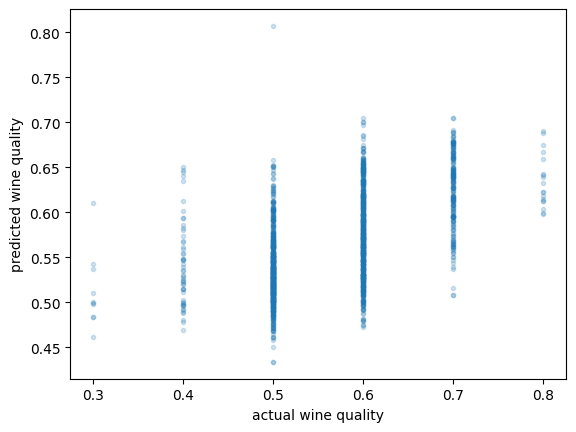

In [ ]:
# Run this code to plot the predictions vs the actual targets
import matplotlib.pyplot as plt

plt.plot(y,yhat.detach().numpy(),'.',alpha=0.2);
plt.xlabel('actual wine quality');
plt.ylabel('predicted wine quality');


<hr/>

# Exercise: Single Neuron to Predict Wine Quality -- the Pytorch Way

We're going to make the single neuron wine quality predictor NN using some of the bells and whistles of Pytorch. Follow the steps below. Steps 1 and 4 have been filled in for you, but all others require your code.


1. Run the code provided to load the dataframe, scale it, and turn it into a Tensor Dataset.

2. Use `torch.utils.data.random_split()` on the full dataset to get a training dataset and testing dataset (use 80-20% split). Call them `train_ds` and `test_ds`. 

3. Make a dataloader called `train_dl` out of the `train_ds` dataset. Let's process the whole dataset in one batch and use shuffling.

4. Run the provided code to make your single neuron model by using a `torch.nn.Linear()` layer followed by a `torch.functional.sigmoid()` activation. These are connected together by passing them into`torch.nn.Sequential()`

5. Define a fit function (you can use one from the examples in the last reading) 

6. Train the model using the SGD optimizer with a learning rate of 1e-2 and `torch.nn.functional.mse_loss` as the loss function for 2500 epochs. Plot the loss vs epoch

7. Evaluate the trained model on the (unseen) test data and plot the predictions vs targets.



In [ ]:
# 1. Run this code to load the dataset
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

wine_df = pd.read_csv('https://raw.githubusercontent.com/dylanwalker/MGSC496/main/datasets/winequality-red.csv')
scaler = StandardScaler()
scaler.fit(wine_df.loc[:,'fixed acidity':'alcohol'])
wine_df.loc[:,'fixed acidity':'alcohol'] = scaler.transform(wine_df.loc[:,'fixed acidity':'alcohol'])
wine_df.quality = wine_df.quality/10
wine_df.head()

inputs = torch.tensor(wine_df.loc[:,'fixed acidity':'alcohol'].values, dtype=torch.float32)
targets = torch.tensor(wine_df.loc[:,'quality'].values, dtype=torch.float32).view(-1,1) 
full_ds = TensorDataset(inputs, targets)

# 2. Use torch.utils.data.random_split() to make train_ds, test_ds


# 3. Make a dataloader for train_ds that loads the entire dataset as a single batch with shuffling


# 4. Run the code provided below to make a single neuron model with a sigmoid activation
model = torch.nn.Sequential(torch.nn.Linear(11,1),torch.nn.Sigmoid())


# 5. Define the same fit function (can use one we defined previously) 


# 6. Define a loss function and an optimizer (you can use the same as in the example above) and pass them as arguments into the fit function
#   to train your model for 2500 epochs. Plot the loss vs epoch


# 7. Evaluate the model on (unseen) test data and plot the predictions vs targets


### Solution: Don't look at this until you've tried it

In [ ]:
# 1. Run this code to load the dataset
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

wine_df = pd.read_csv('https://raw.githubusercontent.com/dylanwalker/MGSC496/main/datasets/winequality-red.csv')
scaler = StandardScaler()
scaler.fit(wine_df.loc[:,'fixed acidity':'alcohol'])
wine_df.loc[:,'fixed acidity':'alcohol'] = scaler.transform(wine_df.loc[:,'fixed acidity':'alcohol'])
wine_df.quality = wine_df.quality/10
wine_df.head()

inputs = torch.tensor(wine_df.loc[:,'fixed acidity':'alcohol'].values, dtype=torch.float32)
targets = torch.tensor(wine_df.loc[:,'quality'].values, dtype=torch.float32).view(-1,1) 
full_ds = TensorDataset(inputs, targets)

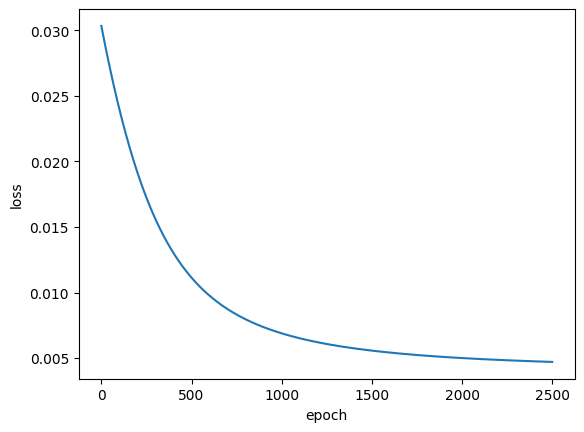

In [ ]:
# 2. Use torch.utils.data.random_split() to make train_ds, test_ds
train_ds, test_ds =  torch.utils.data.random_split(full_ds,[0.8, 0.2])

# 3. Make a dataloader for train_ds that loads the entire dataset as a single batch with shuffling
train_dl = DataLoader(train_ds, batch_size=len(train_ds), shuffle=True)

# 4. Run the code provided below to make a single neuron model with a sigmoid activation
model = torch.nn.Sequential(torch.nn.Linear(11,1),torch.nn.Sigmoid())

# 5. Define the same fit function as was used in the last example 
def fit_gd(num_epochs, model, train_dl, loss_fn, opt):
    losses = []
    model.train() # put the model into training mode (in case it is already in evaluation mode) - we'll talk about this later.
    for epoch in range(num_epochs):
      loss_for_epoch = 0
      opt.zero_grad() # tell the optimizer to zero the gradient so we start fresh on this epoch
      for xb,yb in train_dl: # sample a batch of inputs,targets
        pred = model(xb) # get the predictions
        loss = loss_fn(pred, yb) # calculate the loss for these predictions
        loss_for_epoch += loss.item() # add loss for this batch to the running total of the loss for this epoch
        loss.backward() # propagate the loss backward
      losses.append(loss_for_epoch)
      opt.step() # this tells the optimizer to take one step -- it knows about model weights/biases and learning rate as we passed them when we create opt, this is where weigths are adjusted
    return losses 


#6. Define a loss function and an optimizer (you can use the same as in the example above) and pass them as arguments into the fit function
#   to train your model for 2500 epochs
loss_fn = torch.nn.functional.mse_loss 
opt = torch.optim.SGD(model.parameters(), lr=1e-2)
losses = fit_gd(2500,model,train_dl,loss_fn, opt)
plt.plot(losses);
plt.xlabel('epoch');
plt.ylabel('loss');

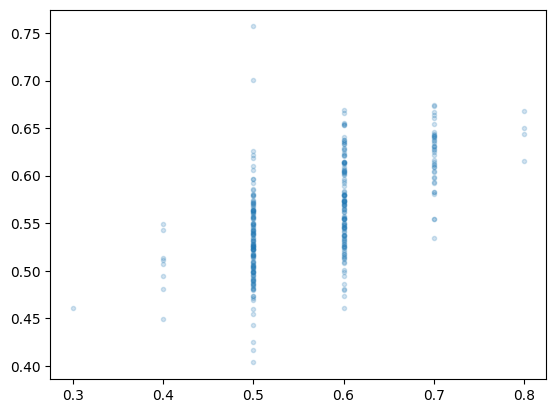

In [ ]:
# 7. evaluate on test data
xt,yt = test_ds[:]
model.eval()
ypred_t = model(xt)
plt.plot(yt.detach().numpy(),ypred_t.detach().numpy(),'.',alpha=0.2);


# In-Class Exercise: Define a simple NN and train it to predict music genre on spotify data

For this exercise, we'll use a dataset from Spotify containing music attributes such as bpm, energy, and danceability. It has 45 songs that belong to either the 'rock' genre or the 'dance pop' genre. For this example, as above, we won't bother to split the data into training and test sets (again, the data here is pretty small).

In [ ]:
# Read the data
musicFile = 'https://raw.githubusercontent.com/dylanwalker/MGSC496/main/datasets/spotify.csv'
musicData = pd.read_csv(musicFile, encoding='latin-1')
musicData.head()

The first step is to define the dataset. 

Make a new column in the dataframe called 'genre_class'. Set it to be 0 for 'rock' and 1 for 'dance pop' (these are the only genres in the dataset).

We need to get our pandas data into torch tensors. One way to do this is to first get them as numpy arrays from the pandas columns using `.values` and then call `torch.tensor()` (we may have to set the dtype to `torch.float32`.

Define the musical attributes ('bpm' through 'speechiness') as a pytorch tensor called `features`.

Define a pytorch tensor called `targets`  based on the column `genre_class`.



In [ ]:
# INSERT YOUR CODE HERE

Now create a TensorDataSet from `features` and `targets` called `train_ds`.

Also create a DataLoader called `train_dl` from `train_ds` using `batch_size=10` and `shuffle=True`. 

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
# INSERT YOUR CODE HERE

Note that we can see the shapes of tensors drawn from the dataloader with our given batch size:

In [ ]:
x1,y1 = next(iter(train_dl)) # pull a single x,y from the data loader
print(x1.shape)
print(y1.shape)

If we wanted to pass these through a loss function, we would likely have to alter the shape of the `y`, to something that our loss function can understand. We can do this with a `.view(-1,1)` operation, which will make it a tensor with 90 rows and 1 column (instead of a 1d tensor), like so:

In [ ]:
y1.view(-1,1)
print(y1.view(-1,1).shape) # this will output a shape of [batch_size,1]

For our neural network model we'll use a single fully connected layer (`torch.nn.Linear()`), followed by a sigmoid activation function (`torch.nn.Sigmoid()`). 

Note that `torch.nn.Linear()` takes two arguments that specify the size of the input and output. You'll have to figure out what these should be based on the data. Remember that we want to connect all the features to a single output thta is then passed through the activation function. `toch.nn.Sigmoid()` does not need any arguments.

We can create a model object from these two layers by passing them as arguments to `torch.nn.Sequential()`. This will make a neural network that connects the output of each layer to the input of the next.

By using the sigmoid function, the output of the fully connected layers is converted into a value between 0 and 1. If the converted value is larger than 0.5, we will interpret this as the model predicting the genre of a music to be 'dance pop' (since we set `genre_class=1` for 'dance pop'. Otherwise, the model predicts the genre to be 'rock' music.

We'll set the random seed of pytorch manually, using `torch.manual_seed(0)` just to ensure that we are all working on the same shuffled sequence. This step is not needed in general when you train a NN with shuffling, but just included to make sure we're all on the same page.

In [ ]:
torch.manual_seed(0)
# model = FILL IN YOUR CODE HERE

Now instantiate an SGD optimizer using `torch.optim.SGD()`. We can use a learning rate of `lr=1e-4`.

For the loss function, we'll use the binary cross entropy loss, `torch.nn.BCELoss()` with the argument `reduction='mean'`. BCELoss is often used in logistic regression.

In [ ]:
# optimizer = FILL IN YOUR CODE HERE
# loss_function = FILL IN YOUR CODE HERE

Now write the code for training the model over 1000 epochs. You can look back at my `fit()` function defined above. You don't need to write this as a function, but can instead just write the code directly.

The model will be trained for 1000 epochs (i.e., you need to loop over epochs).

When you call `loss_function`, on the predictions (`pred`) and the targets (`yb`), you will need to adjust the shape of the targets, as explained above.

We can calculate a running_loss for each epoch by setting `running_loss=0` before looping over the items in `train_dl`.  We can add up the contribution from each batch to the running loss by adding a line `running_loss+=loss.item()` after calling `loss.backward()`.

Finally, we may like to print out the loss for some epochs (there are 1000 epochs, so its overkill to print out the loss for each one). Instead we can print out the loss for only certain values of the epoch -- for example when the epoch divided by 100 has a remainder of 99, or `epoch%100==99`. When this occurs, print out the average loss for that epoch, `running_loss/len(train_dl)`. 

You can also try your hand at calculating either the average training accuracy for an epcoh or the "last batch training accuracy" of the model at these particular epochs.

In [ ]:
# FILL IN YOUR CODE HERE
n_epochs = 1000
model.train()
for epoch in n_epochs:
  pass # replace this with your code (note: pass should be deleted, as its just a placeholder)

Finally, when the model has been fully trained, let's look at a prediction for a particular song. We'll predict the genre of Ariana Grande's "no tears left to cry." This song is classified as 'dance pop' in the Spotify. Here's the music video:

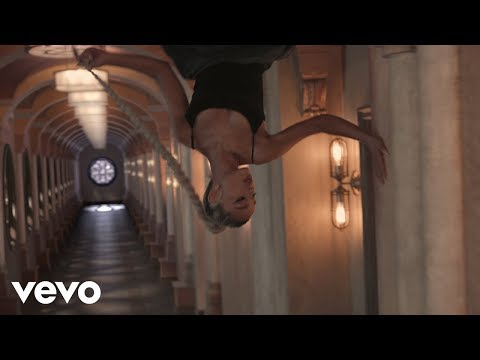

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ffxKSjUwKdU',width=400,height=300)

This particular song has the features (bpm, energy, danceability, liveness, valence, acousticness, speechiness): [122, 71, 70, 29, 35, 4, 6]

Get the prediction for this particular song by passing the appropriate input into the model to get the output. How do you interpret this output?

In [ ]:
# INSERT YOUR CODE HERE

# Misc: Building a DataSet from Pytorch's Dataset Class

Above, we used `TensorDataSet`, but if we want more control we can define our own custom dataset class. Here is an example for the wine data.

In [ ]:
# Load and scale the wine quality data
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler

from torch.utils.data import Dataset

class WineDataset(Dataset):
  def __init__(self):
    # load and transform data
    wine_df = wine_df = pd.read_csv('https://raw.githubusercontent.com/dylanwalker/MGSC496/main/datasets/winequality-red.csv')
    scaler = StandardScaler()
    scaler.fit(wine_df.loc[:,'fixed acidity':'alcohol'])
    wine_df.loc[:,'fixed acidity':'alcohol'] = scaler.transform(wine_df.loc[:,'fixed acidity':'alcohol'])
    wine_df.quality = wine_df.quality/10
    x = wine_df.loc[:,'fixed acidity':'alcohol'].values
    y = wine_df.loc[:,'quality'].values
    
    # make tensors for x,y and store them (along with original dataframe) as attributes
    self.wine_df = wine_df
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)

  def __len__(self):
    return len(self.y)
  
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]

wine_ds = WineDataset()